# Visualizing NCR at Night

## Step 1: Import libraries

In [9]:
import h5py
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Step 2: Define constants

In [10]:
# Shapefile containing the boundary of NCR
SHP_PATH = "data/boundary/ncr_boundary.shp"

# HDF5 file containing the nightlight data
HDF5_PATH = "data/satellite/VNP46A4.A2012001.h30v07.001.2021125045659.h5"

# Datasets in the HDF5 file
DATASET_PATH = "HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/"
LATITUDE_DATASET = DATASET_PATH + "lat"
LONGITUDE_DATASET = DATASET_PATH + "lon"
RADIANCE_DATASET = DATASET_PATH + "NearNadir_Composite_Snow_Free"
MASK_DATASET = DATASET_PATH + "Land_Water_Mask"

## Step 3: Load boundary data 

In [11]:
boundary_gdf = gpd.read_file(SHP_PATH)

In [12]:
boundary_gdf.head()

,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,ADM2ALT1EN,AREA_SQKM,geometry
0,Metropolitan Manila First District,PH13039,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.600152,0.003520,None,41.960090,"POLYGON ((120.99197 14.63653, 120.99197 14.636..."
1,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.948285,0.019613,None,233.767125,"POLYGON ((121.10334 14.53200, 121.10313 14.532..."
2,Metropolitan Manila Third District,PH13075,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.949302,0.010582,None,126.090073,"POLYGON ((121.09951 14.76921, 121.09951 14.769..."
3,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.933806,0.016492,None,196.722285,"POLYGON ((121.10334 14.53200, 121.10385 14.530..."


<Axes: >

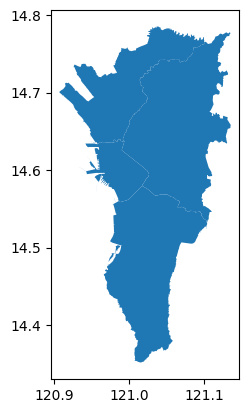

In [13]:
boundary_gdf.plot()

## Step 4: Obtain the datasets 

In [14]:
# Get datasets from HDF5 file
with h5py.File(HDF5_PATH, "r") as hdf5_file:
    latitude_data = hdf5_file[LATITUDE_DATASET][:]
    longitude_data = hdf5_file[LONGITUDE_DATASET][:]
    mask_data = hdf5_file[MASK_DATASET][:]
    radiance_data = hdf5_file[RADIANCE_DATASET][:]

# Set radiance of water pixels to 0
radiance_data[mask_data == 255] = 0

# Get the bounding box of the data
hdf5_extent = [
    longitude_data.min(),
    longitude_data.max(),
    latitude_data.min(),
    latitude_data.max(),
]

In [15]:
hdf5_extent

[120.0, 129.99583333332424, 10.004166666667235, 20.0]

## Step 5: Plot the dataset

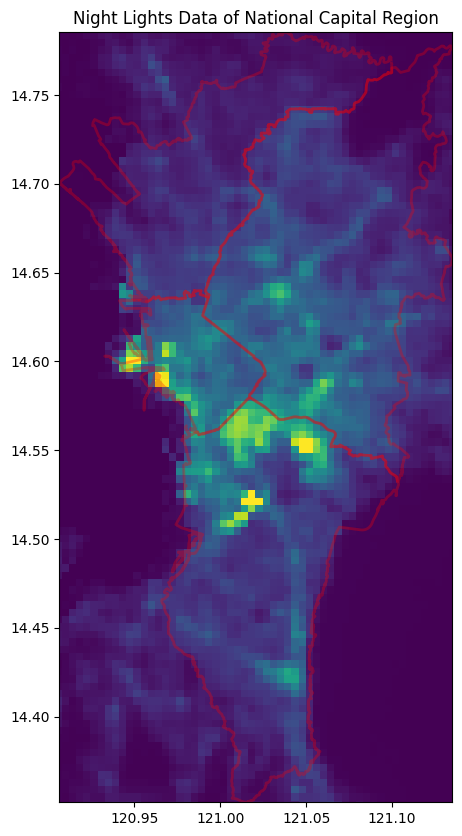

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the radiance data
ax.imshow(
    radiance_data,
    cmap="viridis",
    vmin=0,
    vmax=1000,
    extent=hdf5_extent,
)

# Plot the administrative boundary
boundary_gdf.boundary.plot(ax=ax, color="red", linewidth=2, alpha=0.3)

# Use the boundary of NCR to set the extent of the plot
(minx, miny, maxx, maxy) = ncr_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.title("Night Lights Data of National Capital Region")
plt.show()